# Project: No-show Appointments Data Analysis Project
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>In this project, we will be analyzing the dataset associated with 100k medical appointments in Brazil and more specifically on factors that influence whether or not patients show up for their appointments. The dataset contains 14 variables/characteristics about the patient columns which include:
> 1. PatientId - Patient's identification.
> 2. AppointmentID - An appointment's identification.
> 3. Gender - Male or Female.
> 4. ScheduledDay - The day the patient set up their appointment.
> 5. AppointmentDay - The day the patient actually came for the appointment.
> 6. Age - Patient's age.
> 7. Neighbourhood - Location of the hospital.
> 8. Scholarship - Whether or not the patient  is enrolled in Brazillian welfare program **Bolsa Familia**
> 9. Hipertension - Whether or not the patient is hipertensive.
> 10. Diabetes - Whether or not the patient is diabetic.
> 11. Alcoholism - Whether or not the patient is alcoholic.
> 12. Handcap - Whether or not the patient is handcap.
> 13. SMS_received - 1 or more messages sent to the patient.
> 14. No-show - Whether the patient showed up for the appointment. Where 'No' indicates if the patient showed up their appointment and 'Yes' if they did not show up.
### Question(s) for Analysis

> We plan to explore the following question over the course of the report:
> 1. *What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?*

> To attempt to answer the above question we will further explore the following sub-questions:

> * Does gender have a relation with whether a patient shows up for appointment or not?
> * Does scholarship have a relation with whether a patient shows up for appointment or not?
> * Does sms_received have a relation with whether a patient shows up for appointment or not?
> * Does age have a relation with whether a patient shows up for appointment or not?
> * Does gender and hipertension have an association with whether a patient shows up for appointment or not?

> The question will be addressed in depth in the **data analysis** and **conclusion** sections.

In [3]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, inspect the data to understand the structure of our data and check for cleanliness.

### General Properties

In [4]:
# Load the data
noshow_df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Now, we will get the shape of the data.

In [3]:
# This returns the shape of the dataframe.
noshow_df.shape

(110527, 14)

> There are 110527 patients and 14 columns. Next, We will now get summary statistics of each column in our dataset:

In [4]:
# This returns useful descriptive statistics for each column of the data.
noshow_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the summary statistics, we can see that majority of patients are between ages 18 to 55 years, about 9% of the patients have scholarship, about 19% of the patients are hipertensive, 7% are diabetic, 3% are alcoholic and 2% are handcap and 32% of the patients received 1 or more messages. 

In [5]:
# This displays a concise summary of the dataframe including number of non-null values in each column.
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> From the summary of the dataframe, we can see that there are no missing values, the data-type of ScheduledDay and AppointmentDay is string(object) instead of datetime. Next we will check whether there are duplicate records.

In [6]:
# This returns the number of rows with duplicates
sum(noshow_df.duplicated())

0

> There are no duplicates in the dataset. 

> At the end of this section, we identified four areas that need to be cleaned in the data cleaning section which include: 
> - Fix incorrect datatype of ScheduledDay and AppointmentDay columns
> - Drop PatientId and AppointmentID columns (because they are specific to each patient)
> - Replace the column names to lower case for consistency.
> - Replace No_show column value to numeric for ease in analysis.


### Data Cleaning

> In this section, we will be fixing the problems identified after assessing the structure of the data in the previous section.
 

**1. Fixing incorrect data type of ScheduledDay & AppointmentDay**

In [7]:
noshow_df[['ScheduledDay','AppointmentDay']] = noshow_df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)
noshow_df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

> As shown above, incorrect data types of ScheduledDay and AppointmentDay problem is fixed from object to datetime data type. Next we will drop the two id columns that aren't necessary for the analysis

**2. Drop PatientId & AppointmentID columns**

In [8]:
noshow_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
noshow_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> as displayed above the two columns have been dropped. Lastly we will be replacing the column names into lower case.

**3. Replace the column names to lower case**

In [9]:
# Replace the column_names in lowercase
noshow_df.rename(columns=lambda x:x.strip().lower().replace("-","_"), inplace=True)
noshow_df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**4. Replace no_show column categorical values to numeric**

In [26]:
# Replace no_show column values into numeric
noshow_df['no_show'].replace(['No','Yes'], [0, 1], inplace=True)
noshow_df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


> After cleaning the dataset, we are ready to move on to exploration.

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we compute some relevant statistics, create visualization of dataset and columns and explore relationships between variables with the goal to address the research question.

### Research Question 1 (*What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?*)

> To answer this question, we will explore individual variables one at a time and see how the variable relates the no show appointment incase of relation we will examine further. First, we plot histogram for some variables for the entire dataframe.

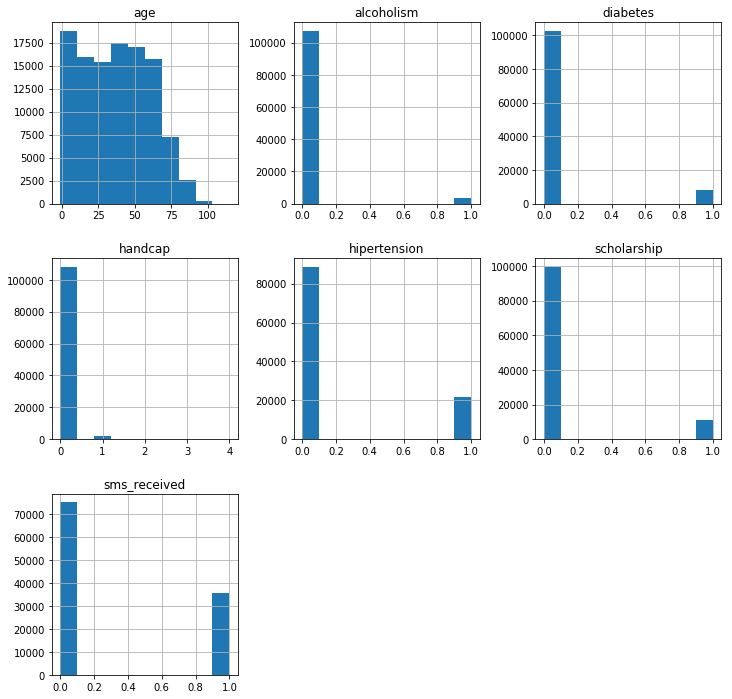

In [10]:
noshow_df.hist(figsize=(12, 12));

> From the histograms plotted above majority of patients are not alcoholic, hipertensive, diabetic or handcap, have no scholarship, did not receive sms or did not show up for their appointment. Now we will explore some individual variables and check whether they are related to a patient showing up or not.

**Does gender have a relation with whether a patient shows up for appointment or not?**

In [13]:
# create a function to plot per individual variable
def plot_var(m,n):
    noshow_df[m].value_counts().plot(kind = n)
    plt.title('No. of Patients by '+ m)
    plt.xlabel(m)
    plt.ylabel('No. of Patients')
    plt.show()
    
    b= noshow_df[m].value_counts()
    return b


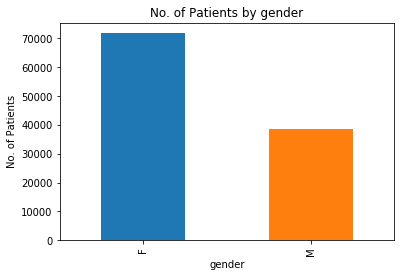

F    71840
M    38687
Name: gender, dtype: int64

In [14]:
plot_var('gender', 'bar')

> The number of female patients are more than male patients. Now lets group patients who show up for appointment or not by gender.

In [15]:
# Create a function to plot a graph groupby a variable
def plot_by(x, y):
    df1= noshow_df.groupby([x])['no_show'].value_counts().unstack()
    df1.plot(kind = y)
    plt.title('No. of no_show by ' + x)
    plt.xlabel(x)
    plt.ylabel('No. of no_show Patients')
    plt.legend(['Present(0)','Absent(1)'])
    plt.show()
    
    z = noshow_df.groupby([x])['no_show'].value_counts()
    return z

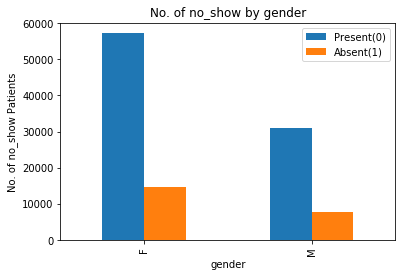

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [16]:
# Plot the relation between gender and no_show
plot_by('gender', 'bar')

> From the above bar plot, the number of female patients are more than the number of male patients in both categories of showing up for appointment and not showing up.

**Does scholarship have a relation with whether a patient shows up for appointment or not?**

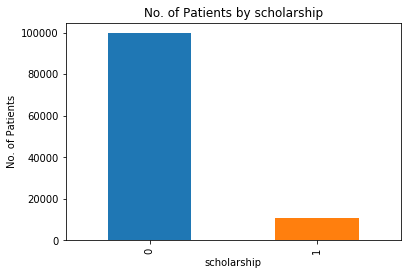

0    99666
1    10861
Name: scholarship, dtype: int64

In [17]:
plot_var('scholarship', 'bar')

From the above plot majority of the patients(99,666) have no scholarship while 10861 patients have a scholarship(receive from the welfare). Lets examine scholarship in relation to whether patients show up or not for appointment.

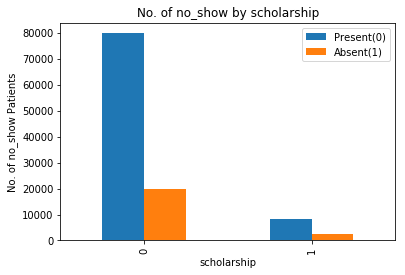

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

In [18]:
# Plot the relation between scholarship and no_show
plot_by('scholarship','bar')

> From the above, for the scholarship columns "0" means not a beneficary and "1" indicates the patient is a beneficary of the scholarship. We can observe the number of patients who don't have a scholarship and show up for appointment is a large number compared to those have a scholarship and don't show up for appointment. We also notice among patients who are beneficary of the scholarship and show up for their appointment (8283) are more than (2578) who are beneficary and don't show up for their appointment.

> Let us further explore by what percentage are patients have a scholarship who show up compare from those who have scholarship but don't show up for appointment. 

In [33]:
# create a function to filter and plot by a specific attribute of a variable.
def plot_filter(b):
    a = noshow_df[b] == 1
    df1 = noshow_df.no_show[a].value_counts()
    df1.plot(kind='pie', labels=(['present(0)','absent(1)']),autopct='%1.0f%%');

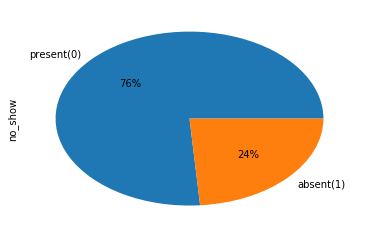

In [37]:
plot_filter('scholarship')

> As shown above, 76% of patients show up and 24% of patients did not show up among those have scholarship.

**Does sms_received have a relation with whether a patient shows up for appointment or not?**

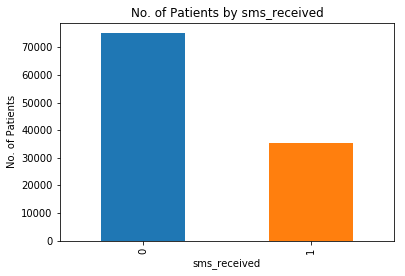

0    75045
1    35482
Name: sms_received, dtype: int64

In [18]:
plot_var('sms_received', 'bar')

> More than twice the number of patients(35,482) who receive sms message 75045 patients did not receive a sms. Lets examine sms_received variable further in relation to whether patients show up or not.

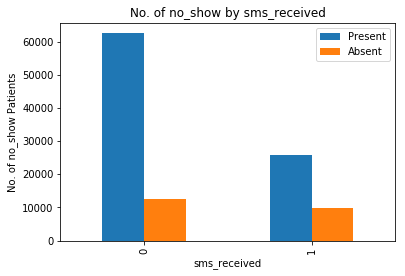

sms_received  no_show
0             0          62510
              1          12535
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [58]:
# Plot the relation between sms_received and no_show
plot_by('sms_received', 'bar')

> From the above, the sms_received columns "0" represent did not receive sms while "1" received sms. The highest number of patients who did not receive a sms showed up for their appointment compared to those who did receive and  did not show up. You also notice among patients who received sms 25,698 patients showed up which is more compared to 9784 patients who didn't show up.

> Let us further explore by what percentage are patients received a sms who show up compare from those who have received a sms but don't show up for appointment.

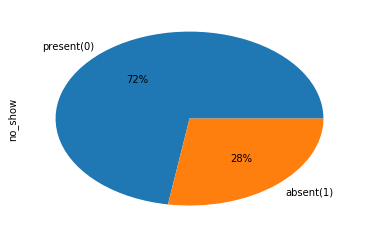

In [36]:
plot_filter('sms_received')

> As shown above, 72% of patients show up and 28% of patients did not show up among those received a sms.

**Does age have a relation with whether a patient shows up for appointment or not?**

In [51]:
show = noshow_df['no_show'] == False
nshow = noshow_df['no_show'] == True

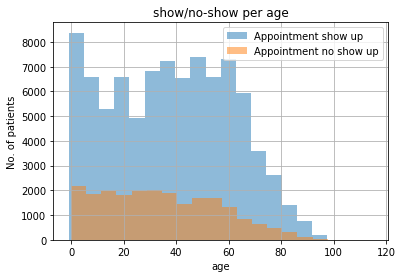

In [53]:
noshow_df.age[show].hist(alpha=0.5, bins=20, label='Appointment show up')
noshow_df.age[nshow].hist(alpha=0.5, bins=20, label='Appointment no show up')
plt.xlabel('age')
plt.ylabel('No. of patients')
plt.title('show/no-show per age')
plt.legend();

> From the above age histogram, we see the number of no_show slightly decrease for high age group and the relation between age and no_show is weak since there is still more patients showing up for their appointment.

**Does gender and hipertension have an association with whether a patient shows up for appointment or not?**

In [23]:
noshow_df.groupby(['gender','hipertension'])['no_show'].value_counts()

gender  hipertension  no_show
F       0             0          44564
                      1          11937
        1             0          12682
                      1           2657
M       0             0          25615
                      1           6610
        1             0           5347
                      1           1115
Name: no_show, dtype: int64

> We also see the number of male and female patients who are not hipertensive and show up for their appointment very compared to patients of both gender and hipertensive who don't show up. There may be a weak association between gender and hipertensive and no_show. Let us plot bar plot for the association.

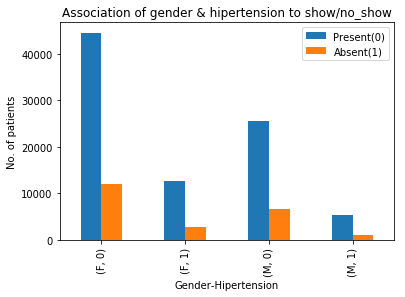

In [21]:
df2 = noshow_df.groupby(['gender','hipertension'])['no_show'].value_counts().unstack()
df2.plot(kind='bar');
plt.title('Association of gender & hipertension to show/no_show')
plt.xlabel('Gender-Hipertension')
plt.ylabel('No. of patients')
plt.legend(['Present(0)','Absent(1)']);


> From the above, the gender-hipertension columns "0" indicates the patient is not hipertensive and "1" the patient is hipertensive. As mentioned earlier in computed statistics, both gender without hipertension show up for their appointment than female and male patients with hipertension. We can also see female hipertensive patients show up for their appointment than male hipertensive patients. 

<a id='conclusions'></a>
## Conclusions

> **Conclusion**:
Research question: *What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?*

>**1. Does gender have a relation with whether a patient shows up for appointment or not?**

>In relation to gender and show/no-show appointment, we observed that female patients showed up for their appointment more than male patients. Therefore conluded that there is a relation between gender and show up for appointment.

>**2. Does scholarship have a relation with whether a patient shows up for appointment or not?**

>In relation to scholarship and show/no-show appointment, we observed patients without scholarship showed up more for their appointment than patients with scholarship. Also among patients with scholarship majority showed up than those who didn't show up. Thus, we concluded that there is a relation between patients with scholarship and show up for appointment.

>**3. Does sms_received have a relation with whether a patient shows up for appointment or not?**

>In relation to sms_received and show/no-show appointment, we noticed that the patients who didn't receive a sms showed up more than those who received a sms. Also among patients who received a sms showed up more than those who did not show up. Hence we conclude there is a relation between patients who received sms and show up for appointment.

>**4. Does age have a relation with whether a patient shows up for appointment or not?**

>In relation to age and show/no-show appointment, we saw that patients of younger age groups are more likely to show up for appointment than patients of older age groups.

>**5. Does gender and hipertension have an association with whether a patient shows up for appointment or not?**

>In relation to gender and hipertension to no-show appointment, we observed that both male and female patients without hipertension who show up for their appointments are a higher number than male and female with hipertension and also female hipertensive patients show up for their appointment than male hipertensive patients. Therefore, we concluded that there is an association between gender and hipertension patients and show-up for appointment.

> **Limitations**:
> - The No_show column values was bit confusing where No for attended while Yes for did not attend.
> - The analysis is only based on descriptive analysis without inferencial statistics.

> **References**
> https://www.kaggle.com/datasets/joniarroba/noshowappointments
> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
> https://datatofish.com/floats-to-integers-dataframe/
> https://www.sharpsightlabs.com/blog/matplotlib-bar-chart/

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0